In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('gender-classifier-DFE-791531.csv',encoding = "ISO-8859-1")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [4]:
df=df.dropna(subset=['gender'])
df = df[df.gender != 'unknown']
df = df[df.gender != 'brand']

In [5]:
df=df[(df['gender:confidence'] >= 0.8)&(df['profile_yn:confidence'] >= 0.8)]

In [6]:
df.gender = df.gender.replace({'male': 1, 'female': 0})

In [7]:
df=df.dropna(subset=['description']).reset_index()


In [8]:
df=df[['text','description','gender']]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8775 entries, 0 to 8774
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         8775 non-null   object
 1   description  8775 non-null   object
 2   gender       8775 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 205.8+ KB


,text,description,gender
0,Robbie E Responds To Critics After Win Against...,i sing my own rhythm.,1
1,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...,1
2,Hi @JordanSpieth - Looking at the url - do you...,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",1
3,Watching Neighbours on Sky+ catching up with t...,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,0
4,"Ive seen people on the train with lamps, chair...",you don't know me.,0


In [9]:
df["text"] = df["text"].str.lower()
df["description"] = df["description"].str.lower()

In [10]:
df['text']=df.text.replace(r"i'm","i am", regex=True)
df['text']=df.text.replace(r"it's","it is", regex=True)
df['text']=df.text.replace(r"she's","she is", regex=True)
df['text']=df.text.replace(r"he's","he is", regex=True)
df['text']=df.text.replace(r"what's","what is", regex=True)
df['text']=df.text.replace(r"where's","where is", regex=True)
df['text']=df.text.replace(r"that's","that is", regex=True)
df['text']=df.text.replace(r"\'ll"," will", regex=True)
df['text']=df.text.replace(r"\'ve"," have", regex=True)
df['text']=df.text.replace(r"\'re"," are", regex=True)
df['text']=df.text.replace(r"\'d"," would", regex=True)
df['text']=df.text.replace(r"won't","will not", regex=True)
df['text']=df.text.replace(r"can't","cannot", regex=True)
df['text']=df.text.replace(r"don't","do not", regex=True)
df['text']=df.text.replace(r"[-()\"#/@;:<>{}+=~|.?,%*]","", regex=True)
df['text']=df.text.replace(r"_\w+","", regex=True)
df['text']=df.text.replace(r"÷\w+","", regex=True)
df['text']=df.text.replace(r"\w+","", regex=True)
df['text']=df.text.replace(r"å\w+","", regex=True)
df['text']=df.text.replace(r"http\w+","", regex=True)

In [11]:
df['description']=df.description.replace(r"i'm","i am", regex=True)
df['description']=df.description.replace(r"it's","it is", regex=True)
df['description']=df.description.replace(r"she's","she is", regex=True)
df['description']=df.description.replace(r"he's","he is", regex=True)
df['description']=df.description.replace(r"what's","what is", regex=True)
df['description']=df.description.replace(r"where's","where is", regex=True)
df['description']=df.description.replace(r"that's","that is", regex=True)
df['description']=df.description.replace(r"\'ll"," will", regex=True)
df['description']=df.description.replace(r"\'ve"," have", regex=True)
df['description']=df.description.replace(r"\'re"," are", regex=True)
df['description']=df.description.replace(r"\'d"," would", regex=True)
df['description']=df.description.replace(r"won't","will not", regex=True)
df['description']=df.description.replace(r"can't","cannot", regex=True)
df['description']=df.description.replace(r"don't","do not", regex=True)
df['description']=df.description.replace(r"[-()\"#/@;!:<>{}+=~|.?,%*]","", regex=True)
df['description']=df.description.replace(r"_\w+","", regex=True)
df['description']=df.description.replace(r"÷\w+","", regex=True)
df['description']=df.description.replace(r"\w+","", regex=True)
df['description']=df.description.replace(r"å\w+","", regex=True)
df['description']=df.description.replace(r"http\w+","", regex=True)
df['description']=df.description.replace(r"0\w+","", regex=True)
df['description']=df.description.replace(r"\n\w+","", regex=True)

In [12]:
df.head(50)

,text,description,gender
0,robbie e responds to critics after win against...,i sing my own rhythm,1
1,felt like they were my friends and i was livi...,i am the author of novels filled with family d...,1
2,hi jordanspieth looking at the url do you us...,mobile guy 49ers shazam google kleiner perkin...,1
3,watching neighbours on sky catching up with th...,ricky wilson the best frontmankaiser chiefs th...,0
4,ive seen people on the train with lamps chairs...,you do not know me,0
5,gala bingo clubs bought for å£241m the uk's la...,the secret of getting ahead is getting started,1
6,the pic defines all mcd fangirlsfanboys and m...,pll fan crazy about mcd ramen is bae,0
7,evielady just how lovely is the tree this year...,renaissance art historian university of nottin...,0
8,giannaaa28 lmao dude i am hella scared for ne...,jmkmü,0
9,coolyazzy94 ditto i am still learning the fav...,over enthusiastic f1 fan model collector musi...,1


In [13]:
tweets=df['text'].values
description=df['description'].values
gender=df[['gender']].values

In [14]:
EMBEDDING_DIM = 100
print('Loading word vectors...')
word2vec = {}
with open(os.path.join('C:/Users/Benyamin/Downloads/DATASET/text_classification/glove.6B/glove.6B.%sd.txt' % EMBEDDING_DIM), encoding="utf8") as f:
  for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:], dtype='float32')
    word2vec[word] = vec
print('Found %s word vectors.' % len(word2vec))

Loading word vectors...
Found 400000 word vectors.


In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer


MAX_VOCAB_SIZE = 20000

tokenizer_tweets = Tokenizer(num_words=MAX_VOCAB_SIZE) 
tokenizer_tweets.fit_on_texts(tweets) 
sequences_tweets = tokenizer_tweets.texts_to_sequences(tweets) 

tokenizer_description = Tokenizer(num_words=MAX_VOCAB_SIZE) 
tokenizer_description.fit_on_texts(description)
sequences_description = tokenizer_description.texts_to_sequences(description) 

In [16]:
word2idx_tweets = tokenizer_tweets.word_index
word2idx_description = tokenizer_description.word_index

print('Found %s unique tokens.' % len(word2idx_tweets))
print('Found %s unique tokens.' % len(word2idx_description))

Found 20491 unique tokens.
Found 22368 unique tokens.


In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_SEQUENCE_LENGTH = 30

data_tweets = pad_sequences(sequences_tweets, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of tweets data tensor:', data_tweets.shape) 

data_description = pad_sequences(sequences_description, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of description data tensor:', data_description.shape) 

Shape of tweets data tensor: (8775, 30)
Shape of description data tensor: (8775, 30)


In [18]:
from sklearn.model_selection import train_test_split
tweets_train, tweets_test, y_train, y_test = train_test_split(data_tweets,gender,test_size=0.2,random_state=101)

description_train, description_test, y_train, y_test = train_test_split(data_description,gender,test_size=0.2,random_state=101)

In [19]:
print('Filling pre-trained embeddings...')
num_words_tweets = min(MAX_VOCAB_SIZE, len(word2idx_tweets) + 1) 
embedding_matrix_tweets = np.zeros((num_words_tweets, EMBEDDING_DIM)) 
for word, i in word2idx_tweets.items():
  if i < MAX_VOCAB_SIZE:
    embedding_vector_tweets = word2vec.get(word)
    if embedding_vector_tweets is not None:
        embedding_matrix_tweets[i] = embedding_vector_tweets
        
        

print('Filling pre-trained embeddings...')
num_words_description = min(MAX_VOCAB_SIZE, len(word2idx_description) + 1) 
embedding_matrix_description = np.zeros((num_words_description, EMBEDDING_DIM))
for word, i in word2idx_description.items():
  if i < MAX_VOCAB_SIZE:
    embedding_vector_description = word2vec.get(word) 
    if embedding_vector_description is not None:
        embedding_matrix_description[i] = embedding_vector_description

Filling pre-trained embeddings...
Filling pre-trained embeddings...


In [20]:
from tensorflow.keras.layers import Embedding

embedding_layer_tweets = Embedding(
  num_words_tweets,
  EMBEDDING_DIM,
  weights=[embedding_matrix_tweets], 
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)


embedding_layer_description = Embedding(
  num_words_description,
  EMBEDDING_DIM,
  weights=[embedding_matrix_description], 
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)

### Prediction Based on Tweets

Train on 7020 samples, validate on 1755 samples
Epoch 1/15
7020/7020 [==============================] - 23s 3ms/sample - loss: 5.5335 - accuracy: 0.5469 - val_loss: 0.7025 - val_accuracy: 0.5966
Epoch 2/15
7020/7020 [==============================] - 14s 2ms/sample - loss: 0.7016 - accuracy: 0.5501 - val_loss: 0.7041 - val_accuracy: 0.5481
Epoch 3/15
7020/7020 [==============================] - 12s 2ms/sample - loss: 0.6977 - accuracy: 0.5697 - val_loss: 0.6899 - val_accuracy: 0.5897
Epoch 4/15
7020/7020 [==============================] - 12s 2ms/sample - loss: 0.6975 - accuracy: 0.5736 - val_loss: 0.6952 - val_accuracy: 0.5715
Epoch 5/15
7020/7020 [==============================] - 13s 2ms/sample - loss: 0.6956 - accuracy: 0.5836 - val_loss: 0.6872 - val_accuracy: 0.6080
Epoch 6/15
7020/7020 [==============================] - 14s 2ms/sample - loss: 0.6969 - accuracy: 0.5852 - val_loss: 0.6910 - val_accuracy: 0.6000
Epoch 7/15
7020/7020 [==============================] - 14s 2ms/sample

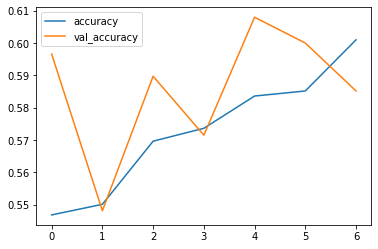

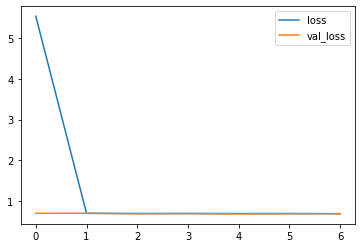

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GRU, Bidirectional, Flatten,Dropout,Dense

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(embedding_layer_tweets)
model.add(Bidirectional(GRU(100, return_sequences=True,kernel_regularizer=tf.keras.regularizers.l2(0.1))))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3) 


model.fit(tweets_train,
  y_train,
  epochs=15,
  validation_data=(tweets_test, y_test), verbose=1,
  callbacks=[early_stop]
  )


losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()


predictions = model.predict_classes(tweets_test) 
from sklearn.metrics import classification_report,confusion_matrix  
print(classification_report(y_test,predictions)) 

### Prediction Based on Profile Description 

Train on 7020 samples, validate on 1755 samples
Epoch 1/15
7020/7020 [==============================] - 22s 3ms/sample - loss: 5.5950 - accuracy: 0.5833 - val_loss: 0.6931 - val_accuracy: 0.6028
Epoch 2/15
7020/7020 [==============================] - 11s 2ms/sample - loss: 0.6886 - accuracy: 0.6003 - val_loss: 0.6828 - val_accuracy: 0.5823
Epoch 3/15
7020/7020 [==============================] - 10s 1ms/sample - loss: 0.6814 - accuracy: 0.6115 - val_loss: 0.7091 - val_accuracy: 0.5772
Epoch 4/15
7020/7020 [==============================] - 10s 1ms/sample - loss: 0.6830 - accuracy: 0.6141 - val_loss: 0.6741 - val_accuracy: 0.6182
Epoch 5/15
7020/7020 [==============================] - 10s 1ms/sample - loss: 0.6706 - accuracy: 0.6262 - val_loss: 0.6747 - val_accuracy: 0.6262
Epoch 6/15
7020/7020 [==============================] - 10s 1ms/sample - loss: 0.6665 - accuracy: 0.6299 - val_loss: 0.6675 - val_accuracy: 0.6274
Epoch 7/15
7020/7020 [==============================] - 13s 2ms/sample

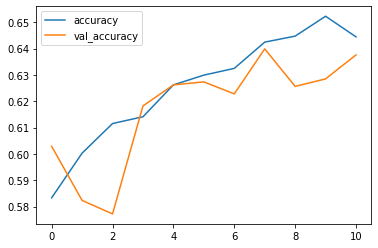

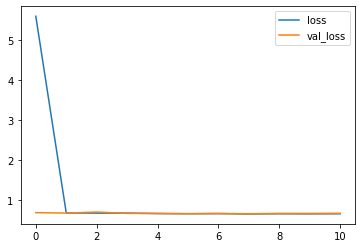

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GRU, Bidirectional, Flatten,Dropout,Dense

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(embedding_layer_description)
model.add(Bidirectional(GRU(100, return_sequences=True,kernel_regularizer=tf.keras.regularizers.l2(0.1))))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3) 


model.fit(description_train,
  y_train,
  epochs=15,
  validation_data=(description_test, y_test), verbose=1,
  callbacks=[early_stop]
  )


losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()


predictions = model.predict_classes(description_test) 
from sklearn.metrics import classification_report,confusion_matrix  
print(classification_report(y_test,predictions)) 

### Prediction Based on Tweets and Description  (functional API)

In [43]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,GRU, Bidirectional,Dropout,Concatenate,Flatten,concatenate
from tensorflow.keras.models import Model

tweets_input=Input(shape=(MAX_SEQUENCE_LENGTH,), name='tweets_input')
description_input=Input(shape=(MAX_SEQUENCE_LENGTH,), name='description_input')


tweets_features = embedding_layer_tweets(tweets_input)
description_features = embedding_layer_description(description_input)



tweets_features = Bidirectional(GRU(100, return_sequences=True,
                                    kernel_regularizer=tf.keras.regularizers.l2(0.1)))(tweets_features)
description_features = Bidirectional(GRU(100, return_sequences=True,
                                        kernel_regularizer=tf.keras.regularizers.l2(0.1)))(description_features)

tweets_features = Dropout(0.5)(tweets_features)
description_features = Dropout(0.5)(description_features)

tweets_features=Flatten()(tweets_features) 
description_features=Flatten()(description_features)

concat=concatenate([tweets_features,description_features])

pred = Dense(1, activation="sigmoid")(concat)

model = Model(inputs=[tweets_input, description_input],
                    outputs=pred )


In [44]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
tweets_input (InputLayer)       [(None, 30)]         0                                            
__________________________________________________________________________________________________
description_input (InputLayer)  [(None, 30)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 100)      2000000     tweets_input[0][0]               
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 30, 100)      2000000     description_input[0][0]          
____________________________________________________________________________________________

Train on 7020 samples, validate on 1755 samples
Epoch 1/15
7020/7020 [==============================] - 95s 13ms/sample - loss: 10.3776 - accuracy: 0.5719 - val_loss: 0.7160 - val_accuracy: 0.5687
Epoch 2/15
7020/7020 [==============================] - 28s 4ms/sample - loss: 0.6930 - accuracy: 0.6110 - val_loss: 0.6845 - val_accuracy: 0.6097
Epoch 3/15
7020/7020 [==============================] - 27s 4ms/sample - loss: 0.6850 - accuracy: 0.6246 - val_loss: 0.6896 - val_accuracy: 0.6182
Epoch 4/15
7020/7020 [==============================] - 22s 3ms/sample - loss: 0.6838 - accuracy: 0.6238 - val_loss: 0.7306 - val_accuracy: 0.5789
Epoch 5/15
7020/7020 [==============================] - 22s 3ms/sample - loss: 0.6745 - accuracy: 0.6433 - val_loss: 0.6834 - val_accuracy: 0.6308
Epoch 6/15
7020/7020 [==============================] - 23s 3ms/sample - loss: 0.6721 - accuracy: 0.6484 - val_loss: 0.6854 - val_accuracy: 0.6393
Epoch 7/15
7020/7020 [==============================] - 22s 3ms/samp

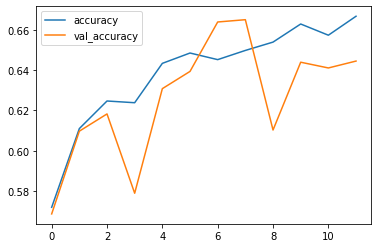

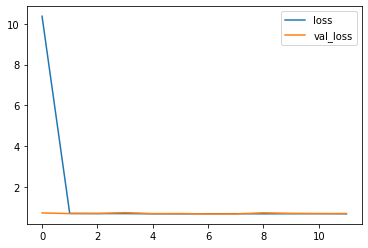

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) 

model.fit([tweets_train,description_train],
          y_train,
          epochs=15,
          validation_data=([tweets_test,description_test],y_test),
          callbacks=[early_stop],
          verbose=1)


losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()




In [46]:
predictions = model.predict([tweets_test,description_test])
predictions = predictions > 0.5  
predictions.astype(int)

from sklearn.metrics import classification_report,confusion_matrix  
print(classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       929
           1       0.64      0.57      0.60       826

    accuracy                           0.64      1755
   macro avg       0.64      0.64      0.64      1755
weighted avg       0.64      0.64      0.64      1755

